In [1]:
import pandas as pd

In [2]:
# Load the dataset to examine its structure
file_path = 'data/data - Sheet1.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,time,map,kRYST4LOL,sask,Xiri,zzr,zzz,Flora,NiNN1,duan,...,xxp,xiyang,jiezou,xiye,LanQ1,haoye,xyu,mint,Y4NG,胜方
0,12/5/2024 21:56:00,地下室,殡仪员·,NaN,NaN,观鸟者,鸽子,NaN,NaN,鹈鹕,...,爆炸王,NaN,加拿大鹅,NaN,NaN,NaN,NaN,NaN,NaN,鸽子
1,12/5/2024 22:02:00,地下室,鹈鹕,NaN,NaN,刺客,鸽子,NaN,NaN,警长,...,观鸟者,NaN,殡仪员,NaN,NaN,NaN,NaN,NaN,NaN,鸭子
2,12/5/2024 22:08:00,地下室,刺客,NaN,NaN,殡仪员,侦探,NaN,NaN,加拿大鹅,...,丧葬者,NaN,观鸟者,NaN,正义使者,NaN,NaN,NaN,NaN,鸭子
3,12/5/2024 22:23:00,地下室,加拿大鹅,NaN,NaN,鹈鹕,鸽子,NaN,NaN,通灵者,...,星界行者,NaN,殡仪员,NaN,刺客,NaN,NaN,NaN,观鸟者,鸽子
4,12/5/2024 22:31:00,地下室,正义使者,NaN,NaN,鹈鹕,观鸟者,NaN,NaN,警长,...,加拿大鹅,NaN,鸽子,NaN,爆炸王,NaN,NaN,NaN,跟踪者,鸭子


In [4]:
data["duan"]

0         鹈鹕
1         警长
2       加拿大鹅
3        通灵者
4         警长
       ...  
246       说客
247       警长
248    生存主义者
249       鹈鹕
250       侦探
Name: duan, Length: 251, dtype: object

玩家胜率统计

In [5]:
# Mapping of roles to categories
duck_roles = {"鸭子", "间谍", "专业杀手", "刺客", "告密者", "静语者", "派对狂", "爆炸王", "身份窃贼", "忍者", "连环杀手", "小丑", "食鸟鸭", "丧葬者", "传教士", "超能力者"}
goose_roles = {"鹅", "肉汁", "通灵者", "正义使者", "警长", "加拿大鹅", "人人恋", "工程师", "模仿者", "侦探", "观鸟者", "政治家", "锁匠", "殡仪员", "网红", "冒险家", "复仇者", "星界行者", "说客", "生存主义者", "跟踪者", "预言家", "科学家", "流浪儿童", "追踪者"}

In [6]:
# Function to calculate the win rate for each player based on their selected role and the winner
def calculate_win_rate_updated(player):
    player_data = data[['胜方', player]].dropna()  # Exclude NaN rows (non-participating rounds)
    total_rounds = len(player_data)
    
    if total_rounds == 0:
        return 0, 0, 0  # If the player did not participate in any rounds
    
    wins = 0
    for _, row in player_data.iterrows():
        selected_role = row[player]
        winner = row['胜方']

        if winner == '鹅' and selected_role in goose_roles:
            wins += 1
        elif winner == '鸭子' and selected_role in duck_roles:
            wins += 1
        elif selected_role == winner:
            wins += 1
    
    # print("{}: {} ({}/{})".format(player, wins / total_rounds, wins, total_rounds))
    win_rate = wins / total_rounds
    return round(win_rate, 3), wins, total_rounds

In [7]:
# List to store the results
results = []

players = data.columns
for player in players[2: -1]:
    # calculate_win_rate_updated(player)
    win_rate, wins, total_rounds = calculate_win_rate_updated(player)
    results.append([player, win_rate, wins, total_rounds])

In [8]:
# Create a DataFrame from the results
win_rate_df = pd.DataFrame(results, columns=["玩家", "总胜率", "胜场", "总场数"])
# win_rate_df = pd.DataFrame(results, columns=["玩家", "总胜率", "胜场", "总场数", "带刀好人胜率", "普通好人胜率", "中立胜率", "鸭子胜率"])

In [9]:
# Sort the DataFrame by 'Win Rate' in descending order
win_rate_df_sorted = win_rate_df.sort_values(by="总胜率", ascending=False)


In [10]:
win_rate_df_sorted

,玩家,总胜率,胜场,总场数
12,uzi,0.323,31,96
1,sask,0.316,18,57
9,suannai,0.297,74,249
17,xiye,0.294,5,17
10,HAOZi,0.286,66,231
18,LanQ1,0.271,58,214
13,Savoki,0.270,33,122
16,jiezou,0.267,28,105
2,Xiri,0.263,20,76
20,xyu,0.260,19,73


In [11]:
# Iterate through the sorted DataFrame and print each row as markdown table format
print("| 玩家 | 总胜率 | 胜场 | 总场数 |")
print("|:-----:|:-----:|:-----:|:-----:|")
for index, row in win_rate_df_sorted.iterrows():
    print(f"| {row['玩家']} | {row['总胜率']} | {row['胜场']} | {row['总场数']} |")

| 玩家 | 总胜率 | 胜场 | 总场数 |
|:-----:|:-----:|:-----:|:-----:|
| uzi | 0.323 | 31 | 96 |
| sask | 0.316 | 18 | 57 |
| suannai | 0.297 | 74 | 249 |
| xiye | 0.294 | 5 | 17 |
| HAOZi | 0.286 | 66 | 231 |
| LanQ1 | 0.271 | 58 | 214 |
| Savoki | 0.27 | 33 | 122 |
| jiezou | 0.267 | 28 | 105 |
| Xiri | 0.263 | 20 | 76 |
| xyu | 0.26 | 19 | 73 |
| NiNN1 | 0.24 | 56 | 233 |
| kRYST4LOL | 0.239 | 60 | 251 |
| xxp | 0.239 | 52 | 218 |
| xiyang | 0.236 | 30 | 127 |
| zzr | 0.236 | 55 | 233 |
| yuzhe | 0.231 | 31 | 134 |
| zzz | 0.231 | 58 | 251 |
| corn | 0.211 | 48 | 227 |
| duan | 0.211 | 48 | 228 |
| mint | 0.211 | 4 | 19 |
| Y4NG | 0.202 | 24 | 119 |
| haoye | 0.185 | 22 | 119 |
| Flora | 0.169 | 11 | 65 |


职业胜率统计

In [12]:
role_results = data['胜方'].value_counts()/data['胜方'].count()

In [13]:
# Convert the result into a DataFrame
role_rate_df = role_results.reset_index()

In [14]:
print("| 阵营 | 胜率 |")
print("|:-----:|:-----:|")
for index, row in role_rate_df.iterrows():
    print(f"| {row['index']} | {row['胜方']:.3f} |")

| 阵营 | 胜率 |
|:-----:|:-----:|
| 鸭子 | 0.287 |
| 鹅 | 0.279 |
| 鸽子 | 0.227 |
| 呆呆鸟 | 0.112 |
| 鹈鹕 | 0.040 |
| 秃鹫 | 0.032 |
| 猎鹰 | 0.024 |


玩家选中职业概率

In [15]:
# duck_roles = {"鸭子", "间谍", "专业杀手", "刺客", "告密者", "静语者", "派对狂", "爆炸王", "身份窃贼", "忍者", "连环杀手"}
# goose_roles = {"鹅", "肉汁", "通灵者", "正义使者", "警长", "加拿大鹅", "人人恋", "工程师", "模仿者", "侦探", "观鸟者", "政治家", "锁匠", "殡仪员", "网红", "冒险家", "复仇者", "星界行者", "说客", "生存主义者", "跟踪者"}

# 这里的带刀角色指的是所有鸭子（包括爆炸王）、带刀/嘴中立、以及可以无条件出刀的好人（例如说客和生存主义者不算这里）
knife_roles = {"鸭子", "间谍", "专业杀手", "刺客", "告密者", "静语者", "派对狂", "爆炸王", "身份窃贼", "忍者", "连环杀手", "正义使者", "警长", "鹈鹕", "猎鹰"}


In [16]:
# Function to calculate the win rate for each player based on their selected role and the winner
def calculate_role_rate_updated(player):
    player_data = data[['胜方', player]].dropna()  # Exclude NaN rows (non-participating rounds)
    total_rounds = len(player_data)
    
    if total_rounds == 0:
        return 0, 0, 0, 0, 0, 0, 0, 0, 0  # If the player did not participate in any rounds
    
    geese = 0
    ducks = 0
    knives = 0
    neutrality = 0

    for _, row in player_data.iterrows():
        selected_role = row[player]
        winner = row['胜方']

        if selected_role in goose_roles:
            geese += 1
        elif selected_role in duck_roles:
            ducks += 1
        else:
            neutrality += 1
        
        if selected_role in knife_roles:
            knives += 1

        # if winner == '鹅' and selected_role in goose_roles:
        #     wins += 1
        # elif winner == '鸭子' and selected_role in duck_roles:
        #     wins += 1
        # elif selected_role == winner:
        #     wins += 1
    
    # print("{}: {} ({}/{})".format(player, wins / total_rounds, wins, total_rounds))
    return total_rounds, round(geese/total_rounds, 3), geese, round(ducks/total_rounds, 3), ducks, round(neutrality/total_rounds, 3), neutrality, round(knives/total_rounds, 3), knives 

In [17]:
# List to store the results
results = []

players = data.columns
for player in players[2: -1]:
    # calculate_win_rate_updated(player)
    total, geese_rate, geese, ducks_rate, ducks, neutrality_rate, neutrality, knives_rate, knives = calculate_role_rate_updated(player)
    results.append([player, total, geese_rate, geese, ducks_rate, ducks, neutrality_rate, neutrality, knives_rate, knives])

In [18]:
role_rate_df = pd.DataFrame(results, columns=["玩家", "总场数", "好人概率", "好人数", "狼人概率", "狼人数", "中立概率", "中立数", "带刀概率", "带刀数"])

In [19]:
role_rate_df

,玩家,总场数,好人概率,好人数,狼人概率,狼人数,中立概率,中立数,带刀概率,带刀数
0,kRYST4LOL,251,0.506,127,0.203,51,0.291,73,0.430,108
1,sask,57,0.509,29,0.298,17,0.193,11,0.439,25
2,Xiri,76,0.579,44,0.145,11,0.276,21,0.329,25
3,zzr,233,0.631,147,0.180,42,0.189,44,0.429,100
4,zzz,251,0.546,137,0.231,58,0.223,56,0.446,112
5,Flora,65,0.538,35,0.231,15,0.231,15,0.385,25
6,NiNN1,233,0.545,127,0.193,45,0.262,61,0.373,87
7,duan,228,0.601,137,0.171,39,0.228,52,0.368,84
8,corn,227,0.489,111,0.211,48,0.300,68,0.449,102
9,suannai,249,0.578,144,0.185,46,0.237,59,0.390,97


In [20]:
# Iterate through the sorted DataFrame and print each row as markdown table format
print("| 玩家 | 好人概率 | 狼人概率 | 中立概率 | 中立及以下概率 | 带刀概率 |")
print("|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|")
for index, row in role_rate_df.iterrows():
    print(f"| {row['玩家']} | {row['好人概率']} ({row['好人数']}/{row['总场数']}) | {row['狼人概率']} ({row['狼人数']}/{row['总场数']}) | {row['中立概率']} ({row['中立数']}/{row['总场数']}) | {row['中立概率'] + row['狼人概率']} ({row['中立数'] + row['狼人数']}/{row['总场数']}) | {row['带刀概率']} ({row['带刀数']}/{row['总场数']}) |")

| 玩家 | 好人概率 | 狼人概率 | 中立概率 | 中立及以下概率 | 带刀概率 |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| kRYST4LOL | 0.506 (127/251) | 0.203 (51/251) | 0.291 (73/251) | 0.494 (124/251) | 0.43 (108/251) |
| sask | 0.509 (29/57) | 0.298 (17/57) | 0.193 (11/57) | 0.491 (28/57) | 0.439 (25/57) |
| Xiri | 0.579 (44/76) | 0.145 (11/76) | 0.276 (21/76) | 0.42100000000000004 (32/76) | 0.329 (25/76) |
| zzr | 0.631 (147/233) | 0.18 (42/233) | 0.189 (44/233) | 0.369 (86/233) | 0.429 (100/233) |
| zzz | 0.546 (137/251) | 0.231 (58/251) | 0.223 (56/251) | 0.454 (114/251) | 0.446 (112/251) |
| Flora | 0.538 (35/65) | 0.231 (15/65) | 0.231 (15/65) | 0.462 (30/65) | 0.385 (25/65) |
| NiNN1 | 0.545 (127/233) | 0.193 (45/233) | 0.262 (61/233) | 0.455 (106/233) | 0.373 (87/233) |
| duan | 0.601 (137/228) | 0.171 (39/228) | 0.228 (52/228) | 0.399 (91/228) | 0.368 (84/228) |
| corn | 0.489 (111/227) | 0.211 (48/227) | 0.3 (68/227) | 0.511 (116/227) | 0.449 (102/227) |
| suannai | 0.578 (144/249) | 0.185 (46/249) 

In [21]:
# Function to calculate the win rate for each player based on their selected role and the winner
def calculate_win_rate_curve(player):
    player_data = data[["time", '胜方', player]]
    # print(player_data)
    player_data['time'] = pd.to_datetime(player_data['time'])  # 转换为日期时间格式
    player_data['day'] = player_data['time'].dt.date          # 提取日期部分

    total_rounds = 0
    wins = 0
    date = str(player_data.iloc[0]['day'])

    winRateCurve = []
    winsCurve = []
    totalCurve = []

    for _, row in player_data.iterrows():
        selected_role = row[player]
        winner = row['胜方']
        today = str(row['day'])

        if today != date:
            if (total_rounds == 0):
                winRateCurve.append(0)
                winsCurve.append(0)
                totalCurve.append(0)
            else:
                winRateCurve.append(wins / total_rounds)
                winsCurve.append(wins)
                totalCurve.append(total_rounds)
            date = today

        # print(winner)
        # if winner == "":
        #     continue

        # 判断 winner 是否为空或无效值
        if pd.isna(selected_role):
            continue

        if winner == '鹅' and selected_role in goose_roles:
            wins += 1
        elif winner == '鸭子' and selected_role in duck_roles:
            wins += 1
        elif selected_role == winner:
            wins += 1
        total_rounds += 1

    if (total_rounds == 0):
        winRateCurve.append(0)
        winsCurve.append(0)
        totalCurve.append(0)
    else:
        winRateCurve.append(wins / total_rounds)
        winsCurve.append(wins)
        totalCurve.append(total_rounds)

    # if total_rounds == 0:
    #     return 0, 0, 0  # If the player did not participate in any rounds
    
    # # print("{}: {} ({}/{})".format(player, wins / total_rounds, wins, total_rounds))
    # win_rate = wins / total_rounds
    # return round(win_rate, 3), wins, total_rounds
    return winRateCurve, winsCurve, totalCurve

胜率曲线

In [23]:
import matplotlib.pyplot as plt

In [24]:
# 获取日期列表
days = sorted(pd.to_datetime(data['time']).dt.date.unique())  # 确保日期按时间排序
days

[datetime.date(2024, 12, 5),
 datetime.date(2024, 12, 6),
 datetime.date(2024, 12, 7),
 datetime.date(2024, 12, 8),
 datetime.date(2024, 12, 9),
 datetime.date(2024, 12, 10),
 datetime.date(2024, 12, 11),
 datetime.date(2024, 12, 12),
 datetime.date(2024, 12, 13),
 datetime.date(2024, 12, 14),
 datetime.date(2024, 12, 15),
 datetime.date(2024, 12, 16),
 datetime.date(2024, 12, 17),
 datetime.date(2024, 12, 18),
 datetime.date(2024, 12, 19)]

C:\Users\Lirz3\AppData\Local\Temp\ipykernel_18420\3605133209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['time'] = pd.to_datetime(player_data['time'])  # 转换为日期时间格式
C:\Users\Lirz3\AppData\Local\Temp\ipykernel_18420\3605133209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['day'] = player_data['time'].dt.date          # 提取日期部分
C:\Users\Lirz3\AppData\Local\Temp\ipykernel_18420\3605133209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

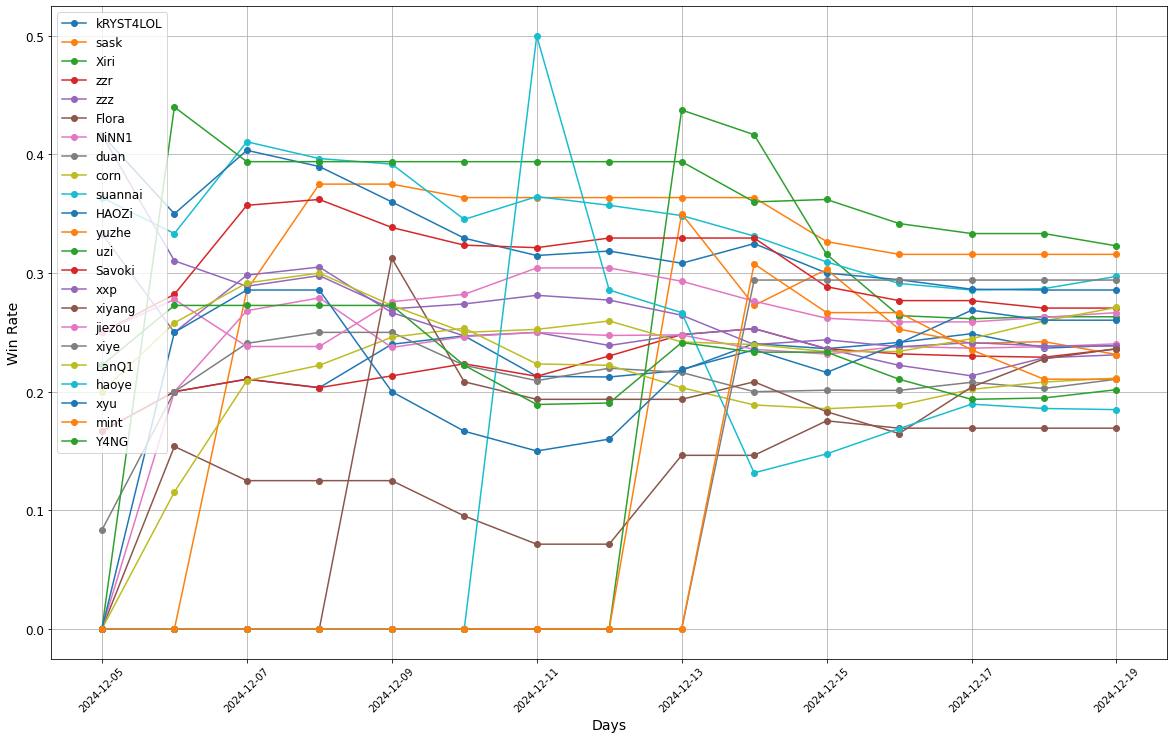

In [31]:
plt.figure(figsize=(20, 12))

days = sorted(pd.to_datetime(data['time']).dt.date.unique())  # 确保日期按时间排序
players = data.columns
for player in players[2: -1]:
    win_rate, _, _ = calculate_win_rate_curve(player)
    plt.plot(days, win_rate, marker='o', linestyle='-', label=player)

plt.xlabel('Days', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45)  # 设置 x 轴刻度
plt.yticks(fontsize=12)
plt.grid(True)  # 添加网格
plt.legend(fontsize=12)  # 添加图例
plt.savefig("image/winCurve.png")
